In [1]:
import numpy as np
import random
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib.font_manager import FontProperties
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable


import os

In [2]:
#EDA
train_df=pd.read_csv(r'D:\Python\Python_Project\Python Covid 19\data2\train.csv')
test_df=pd.read_csv(r'D:\Python\Python_Project\Python Covid 19\data2\test.csv')
#填充缺失值
train_df.fillna("None",inplace=True)
display(train_df.head(5))

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,None,Afghanistan,2020-01-22,0.0,0.0
1,2,None,Afghanistan,2020-01-23,0.0,0.0
2,3,None,Afghanistan,2020-01-24,0.0,0.0
3,4,None,Afghanistan,2020-01-25,0.0,0.0
4,5,None,Afghanistan,2020-01-26,0.0,0.0


In [3]:
#地区,时间信息
print("共有",train_df['Country_Region'].nunique(),' 个地区')
print("共有",train_df['Date'].nunique()," 个时间日期")
print("时间区间",min(train_df['Date']),'至',max(train_df['Date']))

共有 184  个地区
共有 115  个时间日期
时间区间 2020-01-22 至 2020-05-15


<Figure size 3600x2400 with 0 Axes>

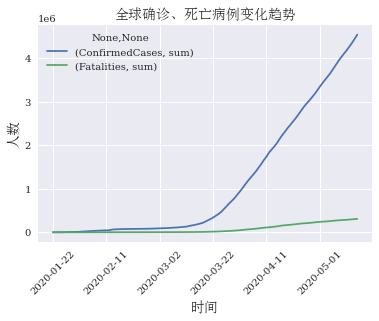

In [4]:
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
confirmed_case=train_df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_case=train_df.groupby(['Date']).agg({'Fatalities':['sum']})
total_case=confirmed_case.join(fatalities_case)
plt.figure(dpi=600)
total_case.plot()
plt.title('全球确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

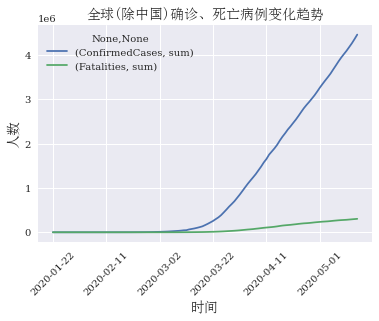

In [5]:
#对中国单独分析，最初的爆发对于研究结果影响比较大
confirmed_no_china=train_df[train_df['Country_Region']!='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_no_china=train_df[train_df['Country_Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_no_china=confirmed_no_china.join(fatalities_no_china)
plt.figure(dpi=600)
total_no_china.plot()
plt.title('全球(除中国)确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

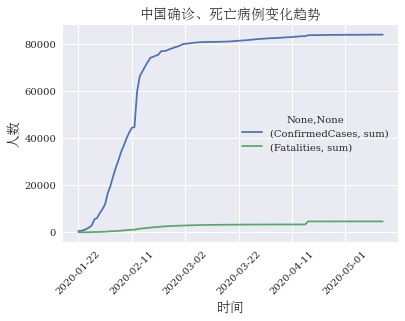

In [6]:
confirmed_china=train_df[train_df['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_china=train_df[train_df['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_china=confirmed_china.join(fatalities_china)
plt.figure(dpi=600)
total_china.plot()
plt.title('中国确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

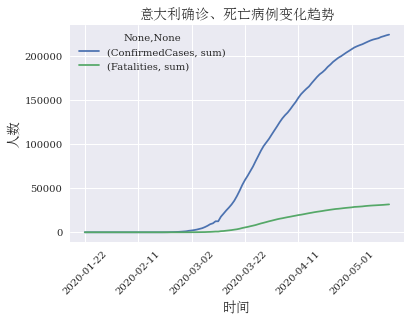

In [7]:
confirmed_Italy=train_df[train_df['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Italy=train_df[train_df['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_Italy=confirmed_Italy.join(fatalities_Italy)
plt.figure(dpi=600)
total_Italy.plot()
plt.title('意大利确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

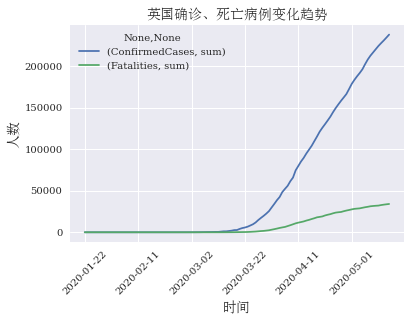

In [8]:
confirmed_UK=train_df[train_df['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_UK=train_df[train_df['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_UK=confirmed_UK.join(fatalities_UK)
plt.figure(dpi=600)
total_UK.plot()
plt.title('英国确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

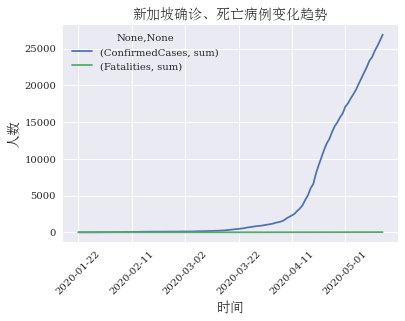

In [9]:
confirmed_S=train_df[train_df['Country_Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_S=train_df[train_df['Country_Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_S=confirmed_S.join(fatalities_S)
plt.figure(dpi=600)
total_S.plot()
plt.title('新加坡确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

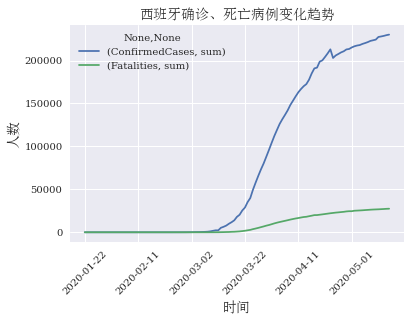

In [10]:
confirmed_Sp=train_df[train_df['Country_Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Sp=train_df[train_df['Country_Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_Sp=confirmed_Sp.join(fatalities_Sp)
plt.figure(dpi=600)
total_Sp.plot()
plt.title('西班牙确诊、死亡病例变化趋势',fontproperties=font)
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

<Figure size 3600x2400 with 0 Axes>

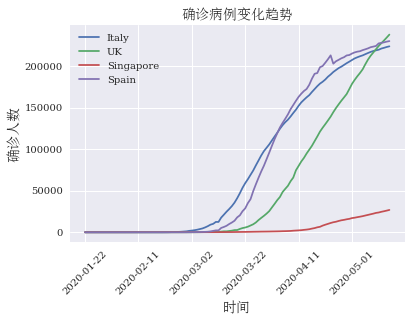

In [11]:
confirmed_Italy.columns=['Italy']
confirmed_Sp.columns=['Spain']
confirmed_S.columns=['Singapore']
confirmed_UK.columns=['UK']
total_four=df = pd.concat([confirmed_Italy, confirmed_UK,confirmed_S,confirmed_Sp], axis=1 )
plt.figure(dpi=600)
total_four.plot()
plt.title('确诊病例变化趋势',fontproperties=font)
plt.ylabel('确诊人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.xticks(rotation=45)
plt.show()

In [12]:
#LSTM模型预测意大利疫情数据
confirmed_Italy.columns=['confirmed']
#数据归一：最大最小值的归一，将指定的数据规范到-1，1之间
scaler = MinMaxScaler(feature_range=(-1, 1))
confirmed_Italy['confirmed'] = scaler.fit_transform(confirmed_Italy['confirmed'].values.reshape(-1,1))
confirmed_Italy

,confirmed
Date,
2020-01-22,-1.000000
2020-01-23,-1.000000
2020-01-24,-1.000000
2020-01-25,-1.000000
2020-01-26,-1.000000
...,...
2020-05-11,0.963633
2020-05-12,0.976157
2020-05-13,0.984090


In [13]:

def load_data(stock, look_back):
    data_raw = stock.values
    data = []


    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])

    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

look_back = 30
x_train, y_train, x_test, y_test = load_data(confirmed_Italy, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (68, 29, 1)
y_train.shape =  (68, 1)
x_test.shape =  (17, 29, 1)
y_test.shape =  (17, 1)


In [14]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [15]:
y_train.size(),x_train.size()

(torch.Size([68, 1]), torch.Size([68, 29, 1]))

In [16]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,drop_p):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,dropout=drop_p, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim,int( hidden_dim*0.3))
        self.fc2 = nn.Linear(int(0.3*hidden_dim), output_dim)
        self.dropout=nn.Dropout(drop_p)

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0),self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out=self.fc1(out)
        out = self.fc2(out[:, -1, :])
        return out

In [17]:
model = LSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=2,drop_p=0.2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
num_epochs=100
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
training_time = time.time()-start_time
print("Training time: {}".format(training_time))
optimiser.step()

Epoch  0 MSE:  0.4541451334953308
Epoch  1 MSE:  0.4028046131134033
Epoch  2 MSE:  0.3765224814414978
Epoch  3 MSE:  0.3556975722312927
Epoch  4 MSE:  0.2958454489707947
Epoch  5 MSE:  0.20818932354450226
Epoch  6 MSE:  0.09519607573747635
Epoch  7 MSE:  0.05564349889755249
Epoch  8 MSE:  0.3030548691749573
Epoch  9 MSE:  0.06074707582592964
Epoch  10 MSE:  0.1687053143978119
Epoch  11 MSE:  0.0569310188293457
Epoch  12 MSE:  0.017423801124095917
Epoch  13 MSE:  0.02743983082473278
Epoch  14 MSE:  0.043928179889917374
Epoch  15 MSE:  0.05635668337345123
Epoch  16 MSE:  0.05766497179865837
Epoch  17 MSE:  0.05311879515647888
Epoch  18 MSE:  0.047825880348682404
Epoch  19 MSE:  0.03898937627673149
Epoch  20 MSE:  0.03278951719403267
Epoch  21 MSE:  0.032610975205898285
Epoch  22 MSE:  0.037463992834091187
Epoch  23 MSE:  0.03891468420624733
Epoch  24 MSE:  0.03511383384466171
Epoch  25 MSE:  0.028549034148454666
Epoch  26 MSE:  0.02008548006415367
Epoch  27 MSE:  0.015289555303752422
Epo

In [19]:

predict = pd.DataFrame(y_train_pred.detach().numpy())
original = pd.DataFrame(y_train.detach().numpy())

In [20]:
np.shape(y_train_pred)

torch.Size([68, 1])

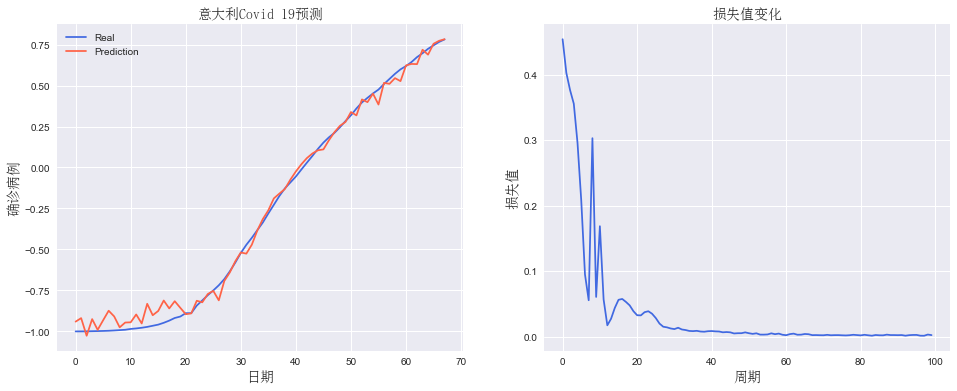

In [21]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Real", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Prediction", color='tomato')
ax.set_title('意大利Covid 19预测', size = 14, fontweight='bold',fontproperties=font)
ax.set_xlabel("日期", size = 14,fontproperties=font)
ax.set_ylabel("确诊病例", size = 14,fontproperties=font)



plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("周期", size = 14,fontproperties=font)
ax.set_ylabel("损失值", size = 14,fontproperties=font)
ax.set_title("损失值变化", size = 14, fontweight='bold',fontproperties=font)
fig.set_figheight(6)
fig.set_figwidth(16)

In [22]:
import math, time
from sklearn.metrics import mean_squared_error
y_test_pred = model(x_test)
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

In [23]:
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)
y_test_pred[:,0]

Train Score: 5561.30 RMSE
Test Score: 3769.01 RMSE


array([200247.28, 204907.19, 209404.62, 209581.05, 210772.88, 213809.67,
       204466.58, 212760.34, 215046.45, 215729.06, 214778.62, 215946.2 ,
       217423.98, 219061.31, 214584.06, 219178.42, 213979.83],
      dtype=float32)

In [24]:
df=confirmed_Italy.to_numpy()
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(y_train_pred)+look_back,:] = y_train_pred


testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(y_train_pred)+look_back-1:len(df)-1,:] =y_test_pred

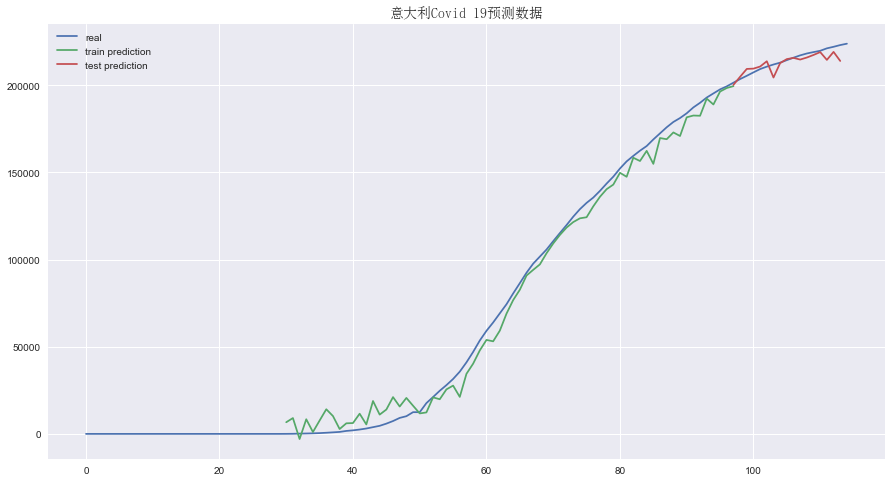

In [25]:
plt.figure(figsize=(15,8))
plt.title("意大利Covid 19预测数据",fontproperties=font)
plt.plot(scaler.inverse_transform(df),label="real")
plt.plot(trainPredictPlot,label='train prediction')
plt.plot(testPredictPlot,label='test prediction')
plt.legend()
plt.show()

In [26]:
'''
使用Prophet算法预测 意大利数据 17 天数据
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn import preprocessing
import time
import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [27]:
#划分训练集、测试集
index=98
print(index)
confirmed_Italy=train_df[train_df['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_Italy=train_df[train_df['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
train_df=confirmed_Italy[:index]
test_df=confirmed_Italy[index:]
train_df

98


,ConfirmedCases
,sum
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-04-24,192994.0
2020-04-25,195351.0


In [28]:
#使用进行Prophet时间序列分析
train_df['ds']=pd.date_range('2020-01-22',periods=98)
train_df.columns=['y','ds']

In [29]:
'''
线性回归 linear 使用交叉验证的方法找出最佳参数
调整参数：趋势灵活性 changepoint_prior_scale - 0.9
        不确定区间 interval_width - 0.9
        断点区间 changepoint_range - default 0.8
交叉验证找出最佳参数
'''
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# param_grid = {
#     'changepoint_prior_scale': [0.6, 0.7, 0.8 , 0.9,1.0],
#     'interval_width': [0.6, 0.7, 0.8 , 0.9,1.0],
# }
#
# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# mses = []  # Store the RMSEs for each params here
#
# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params,changepoint_range=1).fit(train_df)  # Fit model with given params
#     df_cv = cross_validation(m,horizon='17 days',parallel='processes')
#     #该参数rolling_window指定在每个滚动窗口中使用的预测比例。默认为 0.1，对应df_cv每个窗口包含的行数的 10%
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     mses.append(df_p['mse'].values[0])
#
# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['mse'] = mses
# print(tuning_results)

Importing plotly failed. Interactive plots will not work.


In [30]:
#找出最佳参数
# best_params = all_params[np.argmin(mses)]
# print(best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


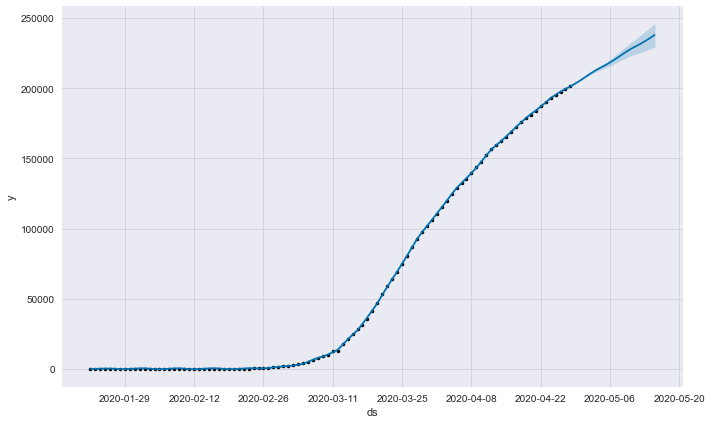

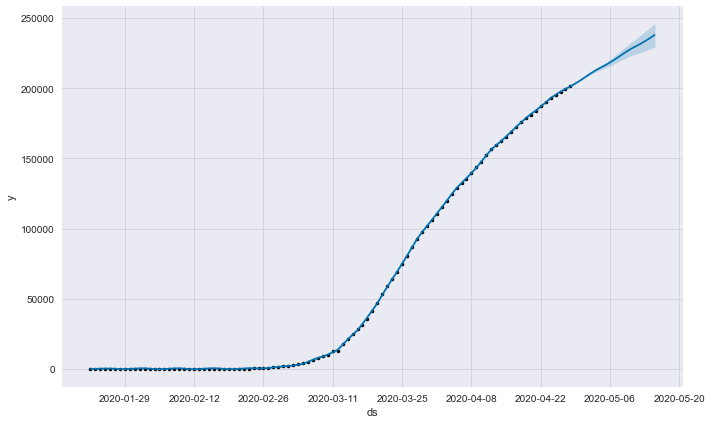

In [31]:
#使用最佳参数进行拟合 'changepoint_prior_scale': 1.0, 'interval_width': 0.6
m=Prophet(changepoint_range=1,interval_width=0.6,changepoint_prior_scale=0.6)
m.fit(train_df)
future=m.make_future_dataframe(periods=17,freq='D')
forecast=m.predict(future)
m.plot(forecast)

In [32]:
df_predict=forecast['yhat'].to_frame()
df_predict_1=df_predict[index:]
df_predict_1.index=pd.date_range('2020-04-29',periods=17)
df_predict_1

,yhat
2020-04-29,203478.624323
2020-04-30,205655.356705
2020-05-01,208049.843719
2020-05-02,210418.993500
2020-05-03,212658.056098
2020-05-04,214583.206451
2020-05-05,216389.749097
2020-05-06,218478.811325
2020-05-07,220655.543707
2020-05-08,223050.030722


In [33]:
#计算均方误差
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(test_df,df_predict_1)
print(MSE1)

53471879.73591261


In [34]:
'''
似乎线性回归的方法不是很理想，均方误差MSE=14372310874256.
下面是逻辑回归的方法，即 Prophet 逻辑回归 交叉验证求出最佳参数 逻辑回归设置 cap=33988797
'''
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# param_grid = {
#     'changepoint_prior_scale': [0.6, 0.7, 0.8 , 0.9,1.0],
#     'interval_width': [0.6, 0.7, 0.8 , 0.9,1.0],
# }
#
# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# mses = []  # Store the RMSEs for each params here
#
# # Use cross validation to evaluate all parameters
# for params in all_params:
#     train_df['cap']=250000
#     train_df['floor']=0
#     m = Prophet(**params,changepoint_range=1,growth='logistic').fit(train_df)  # Fit model with given params
#     df_cv = cross_validation(m,horizon='17 days',parallel='processes')
#     #该参数rolling_window指定在每个滚动窗口中使用的预测比例。默认为 0.1，对应df_cv每个窗口包含的行数的 10%
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     mses.append(df_p['mse'].values[0])
#
# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['mse'] = mses
# print(tuning_results)

In [35]:
#找出最佳参数
# best_params = all_params[np.argmin(mses)]
# print(best_params)

In [36]:
'''
        趋势灵活性 changepoint_prior_scale - 0.9
        不确定区间 interval_width - 0.9
        断点区间 changepoint_range - default 0.8
'''
#使用逻辑回归的方法 需要设置capcity的值 5080663
m=Prophet(changepoint_prior_scale=1.0,interval_width=0.6,changepoint_range=1,growth='logistic')
#拟合模型
train_df['cap']=250000
train_df['floor']=0
m.fit(train_df)
#计算预测值 periods表示需要预测的点数 freq 表示预测的频率
future=m.make_future_dataframe(periods=17,freq='D')
future.tail()
future['cap']=250000
future['floor']=0
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, '意大利确诊人数预测数据')

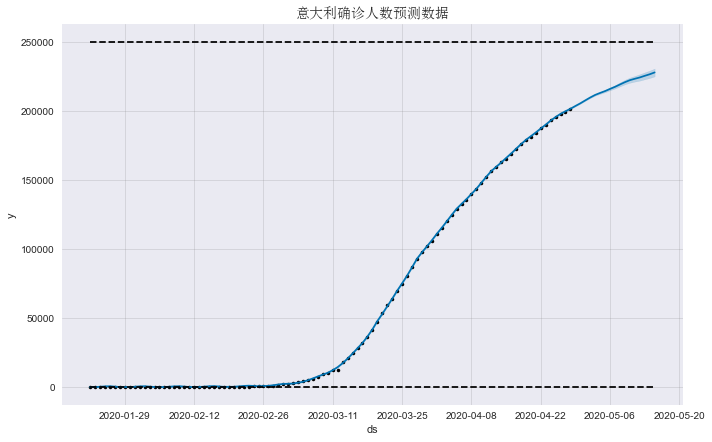

In [37]:
m.plot(forecast)
plt.title("意大利确诊人数预测数据",fontproperties=font)

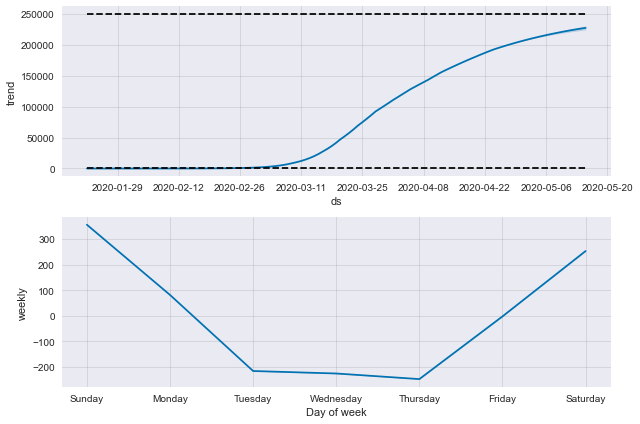

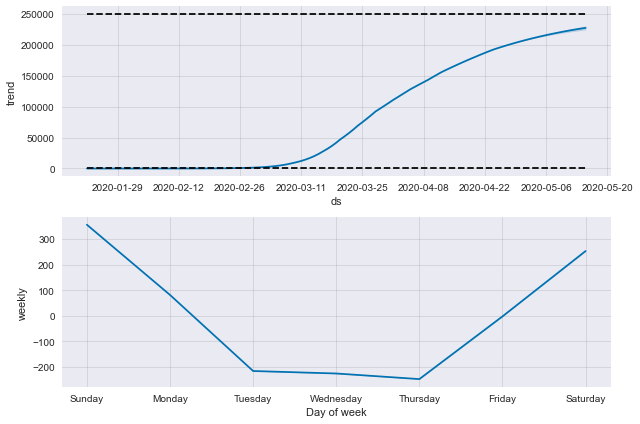

In [38]:
m.plot_components(forecast)

In [39]:
df_predict=forecast['yhat'].to_frame()
df_predict_1=df_predict[index:]
df_predict_1.index=pd.date_range('2020-04-29',periods=17)
df_predict_1

,yhat
2020-04-29,203417.725586
2020-04-30,205356.836876
2020-05-01,207497.637249
2020-05-02,209583.911303
2020-05-03,211453.382265
2020-05-04,212881.782901
2020-05-05,214225.161329
2020-05-06,215795.845060
2020-05-07,217294.790729
2020-05-08,219002.764370


In [40]:
#计算均方误差
from sklearn.metrics import mean_squared_error
RMSE1=math.sqrt(mean_squared_error(test_df,df_predict_1))
print(RMSE1)

2170.3988119108767


<Figure size 9600x5400 with 0 Axes>

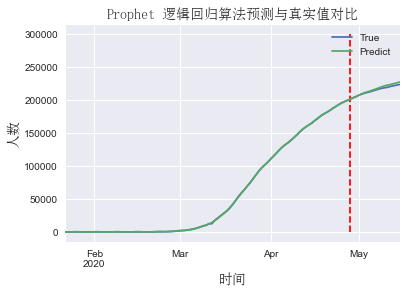

In [41]:
#绘制真实值与预测值图形
df_predict.index=pd.date_range('2020-01-22',periods=115)
confirmed_Italy.index=pd.date_range('2020-01-22',periods=115)
total=confirmed_Italy.join(df_predict)
total.columns=['True','Predict']
plt.figure(figsize=(16,9),dpi=600)
total.plot()
plt.title('Prophet 逻辑回归算法预测与真实值对比',fontproperties=font)
plt.vlines(['2020-04-28'],0,300000, colors='r', linestyles='dashed')
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.legend()
plt.show()

'\n同样是预测 未来17天的数据\nLSTM的预测模型 RMSE＝3624.56\nProhet预测模型 RMSE=2170.3988119108767\nLSTM Prohet混合预测模型 RMSE=993.0486939597334\n'

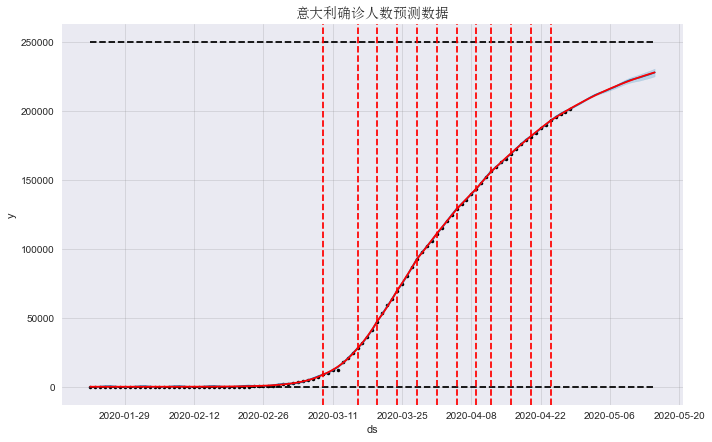

In [42]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('意大利确诊人数预测数据',fontproperties=font)
'''
同样是预测 未来17天的数据
LSTM的预测模型 RMSE＝3624.56
Prohet预测模型 RMSE=2170.3988119108767
LSTM Prohet混合预测模型 RMSE=993.0486939597334
'''

In [43]:
num1=y_test_pred
num1

array([[200247.28],
       [204907.19],
       [209404.62],
       [209581.05],
       [210772.88],
       [213809.67],
       [204466.58],
       [212760.34],
       [215046.45],
       [215729.06],
       [214778.62],
       [215946.2 ],
       [217423.98],
       [219061.31],
       [214584.06],
       [219178.42],
       [213979.83]], dtype=float32)

In [44]:
num2=df_predict_1.to_numpy()
num2

array([[203417.72558647],
       [205356.8368764 ],
       [207497.63724888],
       [209583.91130251],
       [211453.38226503],
       [212881.78290067],
       [214225.161329  ],
       [215795.84506025],
       [217294.79072887],
       [219002.76436989],
       [220664.185885  ],
       [222117.3365393 ],
       [223138.43287552],
       [224083.93587413],
       [225266.51859103],
       [226387.41968663],
       [227727.62762849]])

100%|██████████| 100/100 [00:00<00:00, 4559.82it/s]

0 2170.398811910882
1 2116.190311917529
2 2062.3285832826637
3 2008.8415107235703
4 1955.7598601954576
5 1903.117347577397
6 1850.9519838036001
7 1799.30482871342
8 1748.2217563414408
9 1697.7538292365161
10 1647.957337066809
11 1598.8961006388874
12 1550.6381798027878
13 1503.2620922809674
14 1456.8538770859566
15 1411.5083827197996
16 1367.331641662591
17 1324.4406759135197
18 1282.964406331436
19 1243.0448517069556
20 1204.8353446783417
21 1168.5061930605318
22 1134.2362795178487
23 1102.2161815384745
24 1072.6507471834595
25 1045.7468378626052
26 1021.7139635590023
27 1000.7600207662821
28 983.0815786410149
29 968.8566208871825
30 958.2410220074468
31 951.3551088332341
32 948.2792010891721
33 949.0509005437543
34 953.6616579559175
35 962.0549439432266
36 974.1326902505165
37 989.762134622964
38 1008.7767852939804
39 1030.9883298108603
40 1056.198455126164
41 1084.194912726733
42 1114.7677137623778
43 1147.7123618782055
44 1182.8333398132222
45 1219.93516321994
46 1258.8489072077462

<Figure size 4800x3000 with 0 Axes>

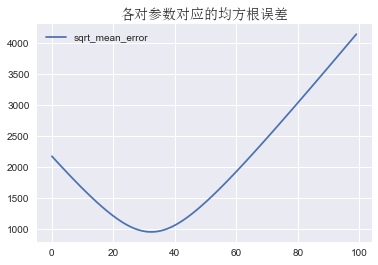

In [45]:
from tqdm import tqdm
mean_error=[]
for i in tqdm(range(100)):
    j=100-i
    num3=(i*num1+num2*j)*0.01
    m1=math.sqrt(mean_squared_error(test_df.to_numpy(), num3))
    mean_error.append(m1)
    print(i,m1)
error_df=pd.DataFrame({'sqrt_mean_error':mean_error},index=range(0,100))
plt.figure(figsize=(8,5),dpi=600)
error_df.plot()
plt.title("各对参数对应的均方根误差",fontproperties=font)
plt.show()

In [49]:
#计算混合模型的预测RMSE
num3=num1*0.33+num2*0.67
math.sqrt(mean_squared_error(test_df.to_numpy(), num3))

949.0519375015429

In [50]:
confirmed_Italy

,real
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-11,219814.0
2020-05-12,221216.0
2020-05-13,222104.0
2020-05-14,223096.0


<Figure size 4800x3000 with 0 Axes>

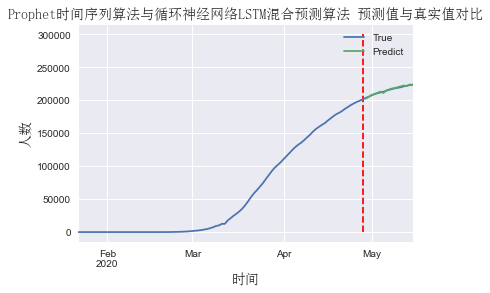

In [51]:
#绘制真实值与预测值图形
df_predict=pd.DataFrame({'prediction':num3.reshape(-1)},index=pd.date_range('2020-4-29',periods=17))
confirmed_Italy.index=pd.date_range('2020-01-22',periods=115)
confirmed_Italy.columns=['real']
total=confirmed_Italy.join(df_predict)
total.columns=['True','Predict']
plt.figure(figsize=(8,5),dpi=600)
total.plot()
plt.title('Prophet时间序列算法与循环神经网络LSTM混合预测算法 预测值与真实值对比',fontproperties=font)
plt.vlines(['2020-04-28'],0,300000, colors='r', linestyles='dashed')
plt.ylabel('人数',fontproperties=font)
plt.xlabel('时间',fontproperties=font)
plt.legend()
plt.show()